In [53]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

0       0.076923
1       0.153846
2       0.230769
3       0.307692
4       0.384615
          ...   
4944    0.714286
4945    0.785714
4946    0.857143
4947    0.928571
4948    1.000000
Length: 4949, dtype: float64

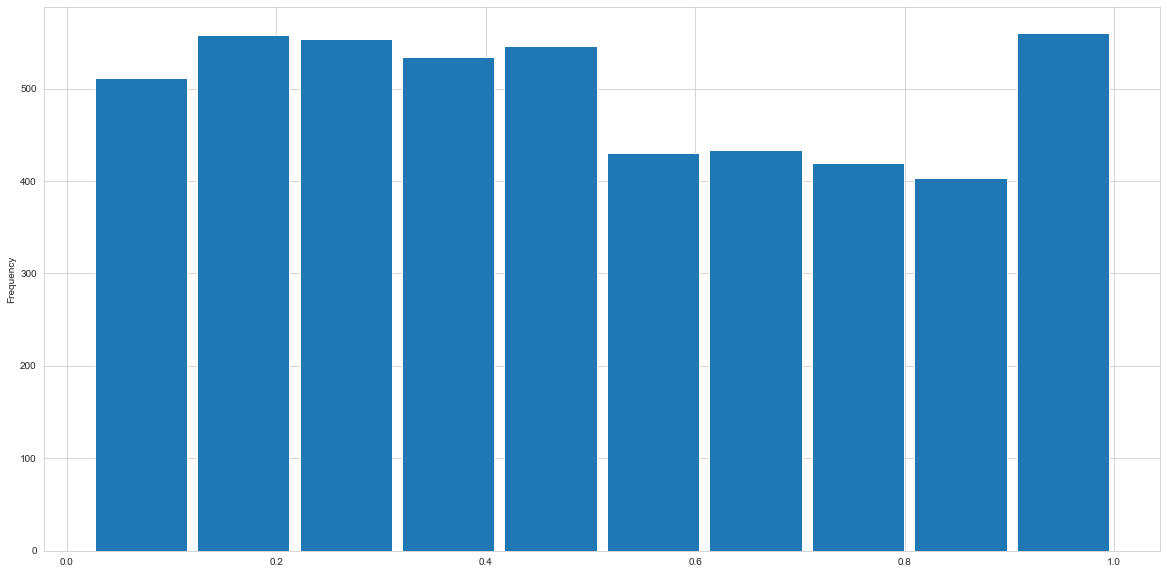

In [113]:
data = pd.read_csv("../data/data_timbre.csv")

NUM_CLASSES = 10
data['binary_order'] = (data['track_number']-1)%NUM_CLASSES # average number of tracks / album

labels = data['binary_order']
# data['labels'] = data['track_number']/data['total_tracks']
labels = (data['track_number']/data['total_tracks'])

columns_to_remove = ['binary_order',
                'Unnamed: 0',
                'Unnamed: 0.1',
                'id',
                'track_title',
                'album_title',
                'album_artist',
                'track_number',
                'total_tracks',
                'order',
                'key',
                'mode',
                'duration_ms',
                'time_signature']
                  
data.drop(columns = columns_to_remove, axis = 1, inplace = True)

        # Train on:
        # Danceability, Energy, Loudness, Speechiness, Acousticness, 
        # Instrumentalness, Liveness, Valence, Tempo, 

        # Labels:
        # Track Number/Total Albums


# data['labels'] = labels
# labels = labels.astype(int)
labels.plot.hist(grid=True, bins=NUM_CLASSES, rwidth=0.9)
labels

In [98]:
data.dropna(inplace = True)
df = data

<AxesSubplot:>

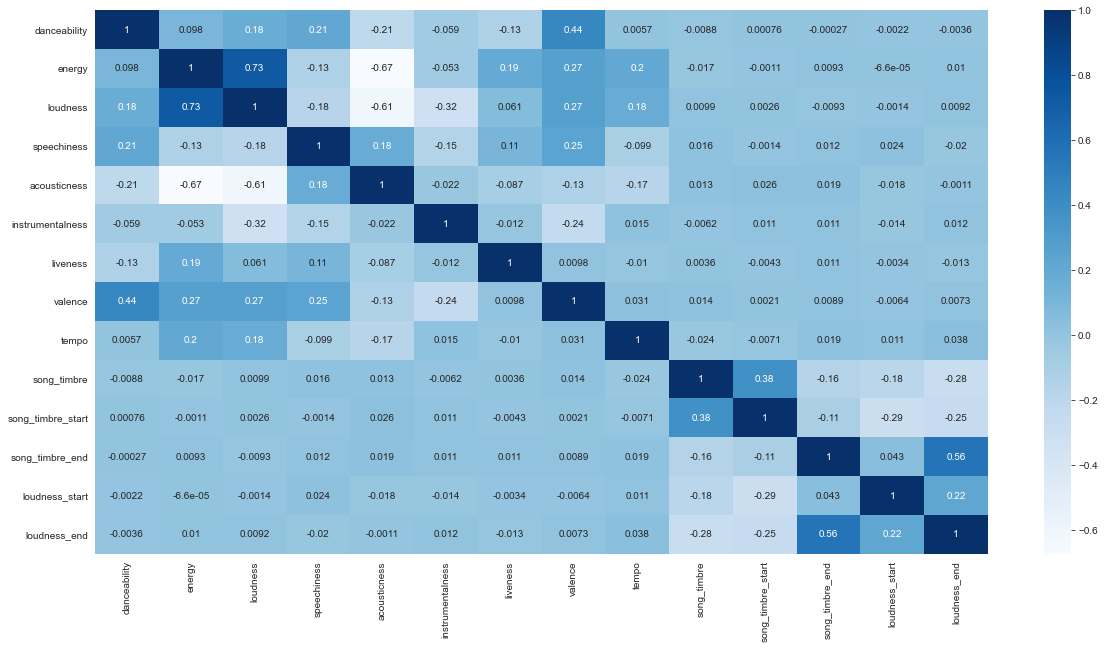

In [99]:
sb.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [127]:
# FEATURE SELECTION & DATA SPLIT

X_var = df.values
y_var = labels.round(1).values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, stratify=y_var, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)
y_train

array([0.4, 0.7, 0.8, ..., 0.1, 0.7, 0.8])

In [128]:
# MODELING
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# Define model:
model = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)
# model.fit(X_train, y_train)
yhat = model.predict(X_test)
pickle.dump(model, open('MODEL.sav', 'wb'))


print(cl('mean_squared_error of model is {}'.format(mean_squared_error(y_test, yhat)), attrs = ['bold']))
print(cl('explained_variance_score of model is {}'.format(explained_variance_score(y_test, yhat)), attrs = ['bold']))
print(cl('r2_score of model is {}'.format(r2(y_test, yhat)), attrs = ['bold']))

mean_squared_error of model is 0.08904267094896913
explained_variance_score of model is -0.06653931275148817
r2_score of model is -0.07019831598478188
